# To implement - pace during route
### Tells the user if his current rate is lower or upper to the estimated

558
558
equal to 0 = 72
greater than 0 = 367


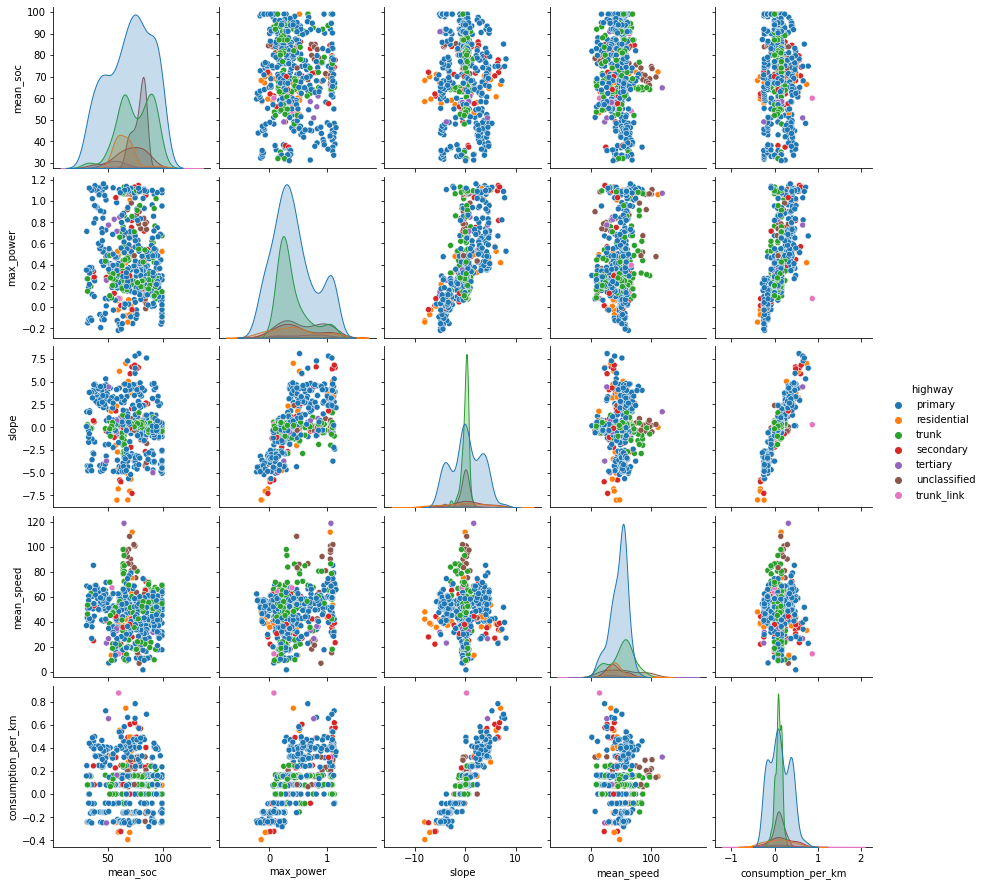

In [1]:
import seaborn as sns
import addcopyfighandler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder  
import statsmodels.stats as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

features = pd.read_csv('mixed_segment_features.csv', index_col=0)
features = features[features['kms'] <= 1.6]
features = features[(features['max_current'] < 250) ]
features = features[(features['traffic_factor'] < 45) ]
features = features[features['user_id'] != 'Juan_Mira']

#features = features[(features['consumption_per_km'] < 0.8) ]

features = features[features['std_acc'] != 0]
features = features[features['max_power'] != 0]

features = features[features['vehicle_id'] != 'FRV020']
#features = features[features['user_id'] != 'Juan']

features['nominal_speed_2'] = (features['nominal_speed'])**2
#features['slope_cat'] = pd.cut(features["slope"], np.arange(0,1.1,0.25) )

print(len(features))
features = features[(features['consumption_per_km'] > -4) | (features['consumption_per_km'] < 1) ].dropna()
print(len(features))

le = LabelEncoder()
features['highway_enc'] = le.fit_transform(features['highway'])
features['slope_cat'] = pd.cut(features["slope"], np.arange(-8.5,8.6,3.4) )
print('equal to 0 =',len(features[features['consumption'] == 0]))
print('greater than 0 =', len(features[features['consumption'] > 0]))

sns.pairplot(features.dropna(), hue='highway',vars=['mean_soc', 'max_power', 'slope', 'mean_speed',
                                             'consumption_per_km'], kind='scatter')


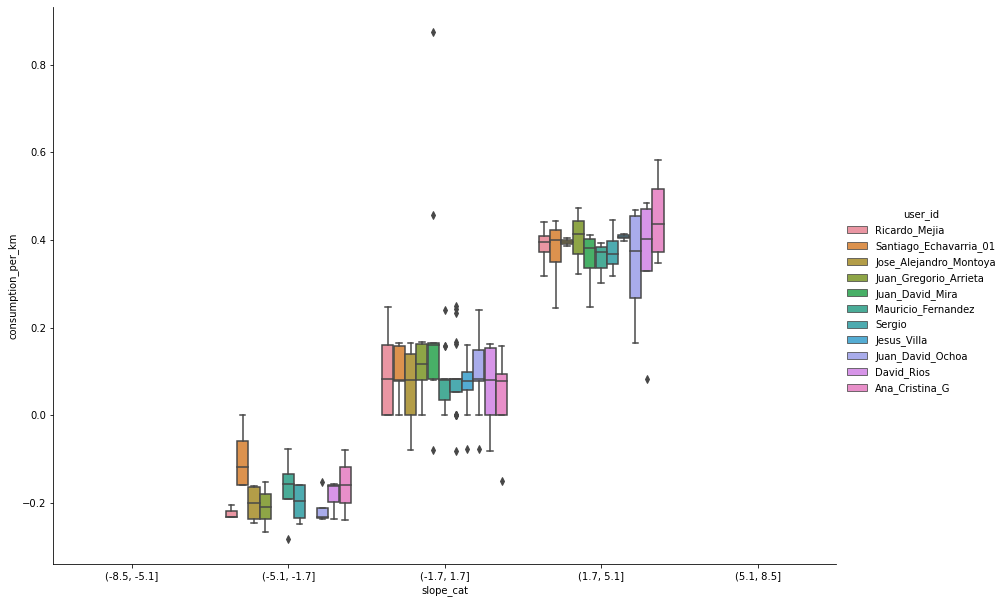

In [2]:
user_plot = features[features['user_id'] != 'Juan']
user_plot = user_plot[user_plot['user_id'] != 'Santiago_Echavarria']
user_plot = user_plot[user_plot['vehicle_id'] != 'FRV020']

train = features[features['user_id'] != 'Juan']
test = features[features['user_id'] == 'Juan']

x=train[(train['slope'] > -5) & (train['slope'] < 5)]
x = x[x['user_id'] != 'Juan_Mira']
x = x[x['user_id'] != 'Santiago_Echavarria']

sns.catplot(x='slope_cat', y='consumption_per_km', hue='user_id', data=x, kind='box', height=8.27, aspect=11.7/8.27)
#
#

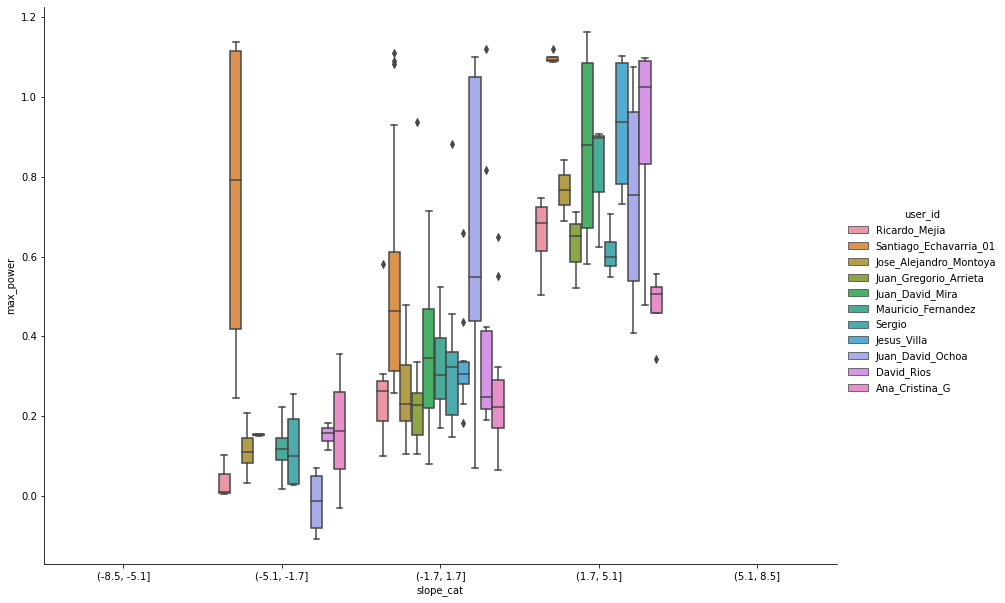

In [3]:
sns.catplot(x='slope_cat', y='max_power', hue='user_id', data=x, kind='box', height=8.27, aspect=11.7/8.27)

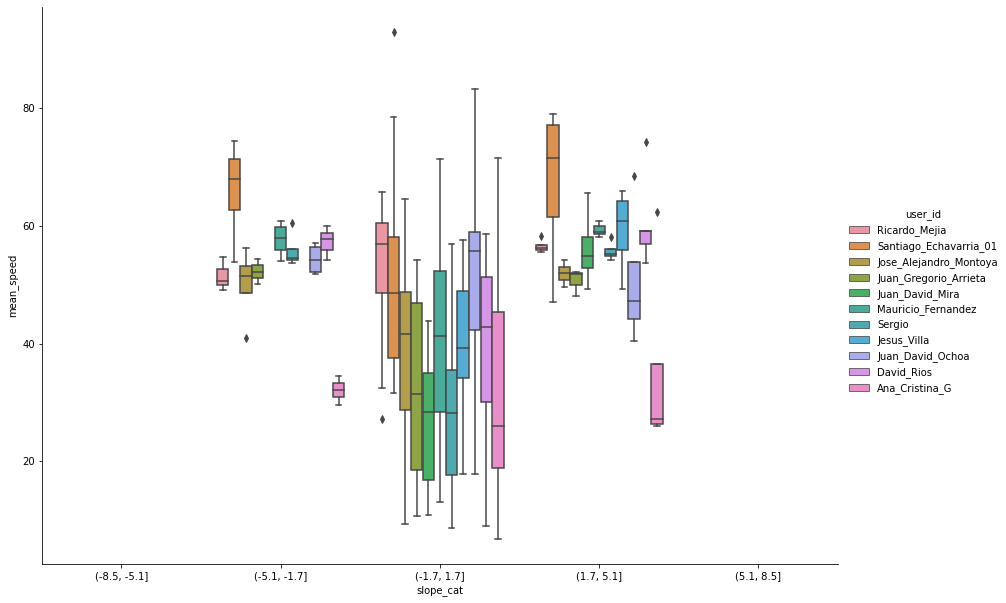

In [4]:
sns.catplot(x='slope_cat', y='mean_speed', hue='user_id', data=x, kind='box', height=8.27, aspect=11.7/8.27)

# Separate 25 km for train and rest for test (for the test user)


In [5]:
features['cumdist']  = features[(features['user_id'] == 'Santiago_Echavarria') ].kms.cumsum()  #features['cumdist'] 
features.loc[features['cumdist'] > 25, 'user_id'] = 'Santiago_Echavarria_test'
features.loc[features['cumdist'] < 25, 'user_id'] = 'Santiago_Echavarria_measure'

In [6]:
train = features[(features['user_id'] != 'Santiago_Echavarria_test') & (features['user_id'] != 'Santiago_Echavarria_measure')]

#train =train[train['user_id'] != 'Santiago_Echavarria']

#train = features[(features['user_id'] != 'Juan') ]
test = features.loc[features.index.difference(train.index)]

train = features[(features['user_id'] != 'Juan') ]
#a = np.random.rand(len(features))
#check=a<0.85
#train = features[check]
#test = features[~check]

In [7]:
test.user_id.unique()

array(['Santiago_Echavarria_measure', 'Santiago_Echavarria_test'],
      dtype=object)

In [8]:
from   scipy import stats

t2, p2 = stats.ttest_ind(user_plot['consumption_per_km'][(user_plot['user_id'] == 'Juan_David_Mira')] ,
                         user_plot['consumption_per_km'][user_plot['user_id'] == 'Mauricio_Fernandez' ])
print('t = ' + str(t2))
print('p = ' + str(p2))

x1=train[(train['slope'] > 1.7) ]
x2=train[(train['slope'] > -1.7) & (train['slope'] <= 1.7)]

# Different slope group
t2, p2 = stats.ttest_ind(x1['consumption_per_km'][(x1['user_id'] == 'Ana_Cristina_G')] ,
                         x2['consumption_per_km'][x2['user_id'] == 'Ana_Cristina_G' ])
print('t = ' + str(t2))
print('p = ' + str(p2))

# Same slope group
t2, p2 = stats.ttest_ind(x2['consumption_per_km'][(x2['user_id'] == 'Juan_David_Mira')] ,
                         x2['consumption_per_km'][x2['user_id'] == 'Ana_Cristina_G' ])
print('t = ' + str(t2))
print('p = ' + str(p2))
# Hacer el test de usuario - pendiente


t = 3.111344433844007
p = 0.0036951455360819036
t = 8.308882073081536
p = 1.4228997358498435e-07
t = 2.1755712504226756
p = 0.03966359210794136


# Slope groups

In [9]:
slope_groups = train.groupby(by=["slope_cat"])
mean_features_by_slope = slope_groups[['max_power', 'std_power']].mean().reset_index()
mean_features_by_slope.rename(columns={"max_power": "mean_max_power","std_power": "mean_std_power", 'slope':'slope_cat'}, inplace=True)

train_cons = pd.merge(left=train, right=mean_features_by_slope,
                      left_on='slope_cat', right_on='slope_cat')

mean_features_by_slope[['slope_cat', 'mean_max_power']]
train['user_id'].unique()

array(['Ricardo_Mejia', 'Santiago_Echavarria_01',
       'Santiago_Echavarria_measure', 'Jose_Alejandro_Montoya',
       'Juan_Gregorio_Arrieta', 'Juan_David_Mira',
       'Santiago_Echavarria_test', 'Mauricio_Fernandez', 'Sergio',
       'Jesus_Villa', 'Juan_David_Ochoa', 'David_Rios', 'Ana_Cristina_G'],
      dtype=object)

# User and slope groups

In [10]:
slope_user_groups = train.groupby(by=['slope_cat', 'user_id'])
mean_max_pot_per_user_and_slope = slope_user_groups[['max_power', 'std_power']].mean().reset_index()
mean_max_pot_per_user_and_slope.rename(columns={"max_power": "mean_max_power_usr",
                    "std_power": "mean_std_power_usr"}, inplace=True)
                    
train_cons = pd.merge(left=train_cons, right=mean_max_pot_per_user_and_slope,
                              left_on=['user_id', 'slope_cat'], right_on=['user_id', 'slope_cat'])
mean_max_pot_per_user_and_slope

,slope_cat,user_id,mean_max_power_usr,mean_std_power_usr
0,"(-8.5, -5.1]",Ana_Cristina_G,NaN,NaN
1,"(-8.5, -5.1]",David_Rios,NaN,NaN
2,"(-8.5, -5.1]",Jesus_Villa,NaN,NaN
3,"(-8.5, -5.1]",Jose_Alejandro_Montoya,NaN,NaN
4,"(-8.5, -5.1]",Juan_David_Mira,NaN,NaN
...,...,...,...,...
60,"(5.1, 8.5]",Ricardo_Mejia,NaN,NaN
61,"(5.1, 8.5]",Santiago_Echavarria_01,0.778463,0.254013
62,"(5.1, 8.5]",Santiago_Echavarria_measure,NaN,NaN
63,"(5.1, 8.5]",Santiago_Echavarria_test,NaN,NaN


In [11]:
model_ft = train_cons[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']]
selected_ft = train_cons[['mean_max_power_usr','mean_soc','nominal_speed', 'slope', 'consumption_per_km']]
print(len(selected_ft))
selected_ft.corr()

297


,mean_max_power_usr,mean_soc,nominal_speed,slope,consumption_per_km
mean_max_power_usr,1.000000,-0.202887,-0.159557,0.733059,0.713631
mean_soc,-0.202887,1.000000,0.149766,-0.144301,-0.191820
nominal_speed,-0.159557,0.149766,1.000000,-0.048898,-0.077269
slope,0.733059,-0.144301,-0.048898,1.000000,0.907676
consumption_per_km,0.713631,-0.191820,-0.077269,0.907676,1.000000


# Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

train_cons = train_cons[train_cons['consumption_per_km'] < 0.7]
# For other sklearn models differente than linear regression
scaler = MinMaxScaler()
scaler.fit(train_cons[selected_ft.columns])

# For linear regression
scaler_lm = MinMaxScaler()
scaler_lm.fit(train_cons[model_ft.columns])

train_scaled = pd.DataFrame(scaler.transform(train_cons[selected_ft.columns]), columns=selected_ft.columns)

train_lm_scaled = pd.DataFrame(scaler_lm.transform(train_cons[model_ft.columns]), columns=model_ft.columns)
train_lm_scaled['consumption_per_km'] = train_scaled['consumption_per_km']

# Linear Model

In [13]:
formula = 'consumption_per_km ~ slope + mean_max_power_usr + mean_soc + nominal_speed -1 ' # 0.84

lm_consumo = ols(formula = formula, data = train_lm_scaled).fit()
print(lm_consumo.summary())

                                 OLS Regression Results                                
Dep. Variable:     consumption_per_km   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              2836.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):                   4.75e-231
Time:                        16:50:13   Log-Likelihood:                          364.93
No. Observations:                 294   AIC:                                     -721.9
Df Residuals:                     290   BIC:                                     -707.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

<Figure size 720x720 with 0 Axes>

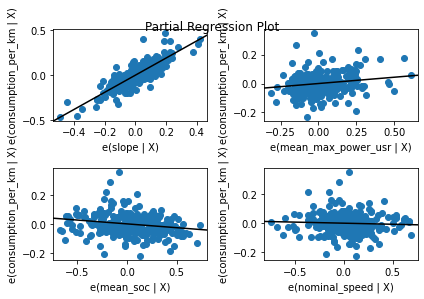

In [21]:
plt.figure(figsize =[10,10])
fig=sm.graphics.plot_partregress_grid(lm_consumo)


# Test case 2


In [14]:
test_test = test[test['user_id']=='Santiago_Echavarria_test']
test_measure = test[test['user_id']=='Santiago_Echavarria_measure']

print(len(test_test))
print(len(test_measure))

slope_user_groups = test_measure.groupby(by=['slope_cat', 'user_id'])
mean_max_pot_test_user_and_slope = slope_user_groups[['max_power', 'std_power']].mean().reset_index()
mean_max_pot_test_user_and_slope.rename(columns={"max_power": "mean_max_power_usr",
                    "std_power": "mean_std_power_usr"}, inplace=True)

mean_max_pot_test_user_and_slope

test_test = pd.merge(how='left', left=test_test, right=mean_max_pot_per_user_and_slope,
                              left_on=['user_id', 'slope_cat'], right_on=['user_id', 'slope_cat'])
test_test


25
19


,num_acc_min,num_acc_fr_min,prom_sobrepaso_acc,prom_sobrepaso_fren,prom_abs_acc,std_acc,num_jerk_acc_min,num_jerk_freno_min,prom_sobrepaso_jerk_acc,prom_sobrepaso_jerk_freno,...,user_id,vehicle_id,speed_ind,passengers,nominal_speed_2,highway_enc,slope_cat,cumdist,mean_max_power_usr,mean_std_power_usr
0,0.000000,0.000000,1.000,1.000,0.070000,0.076763,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.791390,0,2500.00,0,"(-5.1, -1.7]",25.370999,0.080459,0.073914
1,0.000000,0.000000,1.000,1.000,0.056667,0.089415,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.828775,0,2500.00,0,"(-5.1, -1.7]",26.581460,0.080459,0.073914
2,0.000000,0.000000,1.000,1.000,0.076000,0.077485,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.489157,0,900.00,0,"(-5.1, -1.7]",27.797893,0.080459,0.073914
3,0.000000,0.000000,1.000,1.000,0.136000,0.163107,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.510204,0,900.00,0,"(-5.1, -1.7]",29.023414,0.080459,0.073914
4,0.000000,0.000000,1.000,1.000,0.127500,0.148106,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.777684,0,2116.00,0,"(-5.1, -1.7]",30.234554,0.080459,0.073914
5,0.000000,0.000000,1.000,1.000,0.083333,0.098206,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,1.038268,0,4900.00,4,"(-1.7, 1.7]",31.502055,0.389056,0.167361
6,0.000000,0.000000,1.000,1.000,0.064444,0.084327,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.813935,0,2500.00,4,"(-1.7, 1.7]",32.805970,0.389056,0.167361
7,0.000000,0.000000,1.000,1.000,0.323636,0.413429,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.764014,0,1466.89,2,"(-1.7, 1.7]",34.017194,0.389056,0.167361
8,0.333333,0.000000,1.210,1.000,0.250769,0.362849,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,1.155735,0,6400.00,4,"(-1.7, 1.7]",35.360546,0.389056,0.167361
9,0.000000,0.000000,1.000,1.000,0.388235,0.454325,0.000000,0.000000,1.000000,1.000000,...,Santiago_Echavarria_test,GHW284,0.932173,0,2756.25,0,"(-1.7, 1.7]",36.582513,0.389056,0.167361


In [15]:
test_test = pd.merge(how='left', left=test_test, right=mean_features_by_slope,
                     left_on=['slope_cat'], right_on=['slope_cat'])

test_test


,num_acc_min,num_acc_fr_min,prom_sobrepaso_acc,prom_sobrepaso_fren,prom_abs_acc,std_acc,num_jerk_acc_min,num_jerk_freno_min,prom_sobrepaso_jerk_acc,prom_sobrepaso_jerk_freno,...,speed_ind,passengers,nominal_speed_2,highway_enc,slope_cat,cumdist,mean_max_power_usr,mean_std_power_usr,mean_max_power,mean_std_power
0,0.000000,0.000000,1.000,1.000,0.070000,0.076763,0.000000,0.000000,1.000000,1.000000,...,0.791390,0,2500.00,0,"(-5.1, -1.7]",25.370999,0.080459,0.073914,0.140736,0.145088
1,0.000000,0.000000,1.000,1.000,0.056667,0.089415,0.000000,0.000000,1.000000,1.000000,...,0.828775,0,2500.00,0,"(-5.1, -1.7]",26.581460,0.080459,0.073914,0.140736,0.145088
2,0.000000,0.000000,1.000,1.000,0.076000,0.077485,0.000000,0.000000,1.000000,1.000000,...,0.489157,0,900.00,0,"(-5.1, -1.7]",27.797893,0.080459,0.073914,0.140736,0.145088
3,0.000000,0.000000,1.000,1.000,0.136000,0.163107,0.000000,0.000000,1.000000,1.000000,...,0.510204,0,900.00,0,"(-5.1, -1.7]",29.023414,0.080459,0.073914,0.140736,0.145088
4,0.000000,0.000000,1.000,1.000,0.127500,0.148106,0.000000,0.000000,1.000000,1.000000,...,0.777684,0,2116.00,0,"(-5.1, -1.7]",30.234554,0.080459,0.073914,0.140736,0.145088
5,0.000000,0.000000,1.000,1.000,0.083333,0.098206,0.000000,0.000000,1.000000,1.000000,...,1.038268,0,4900.00,4,"(-1.7, 1.7]",31.502055,0.389056,0.167361,0.376319,0.170280
6,0.000000,0.000000,1.000,1.000,0.064444,0.084327,0.000000,0.000000,1.000000,1.000000,...,0.813935,0,2500.00,4,"(-1.7, 1.7]",32.805970,0.389056,0.167361,0.376319,0.170280
7,0.000000,0.000000,1.000,1.000,0.323636,0.413429,0.000000,0.000000,1.000000,1.000000,...,0.764014,0,1466.89,2,"(-1.7, 1.7]",34.017194,0.389056,0.167361,0.376319,0.170280
8,0.333333,0.000000,1.210,1.000,0.250769,0.362849,0.000000,0.000000,1.000000,1.000000,...,1.155735,0,6400.00,4,"(-1.7, 1.7]",35.360546,0.389056,0.167361,0.376319,0.170280
9,0.000000,0.000000,1.000,1.000,0.388235,0.454325,0.000000,0.000000,1.000000,1.000000,...,0.932173,0,2756.25,0,"(-1.7, 1.7]",36.582513,0.389056,0.167361,0.376319,0.170280


In [16]:
test_test[['user_id', 'slope_cat']] = test_test[['user_id', 'slope_cat']].astype('string')

In [326]:
#mean_max_pot_per_user_and_slope['slope_cat'] = mean_max_pot_per_user_and_slope['slope_cat'].astype('string')

In [354]:
# test_consolidated = pd.merge(how='left', left=test_consolidated, right=mean_max_pot_per_user_and_slope,
#                               left_on=['slope_cat', 'user_id'], right_on=['slope_cat', 'user_id'])
# test_consolidated

In [17]:
test_test['mean_max_power_usr'] = test_test.apply(
    lambda row: row['mean_max_power'] if np.isnan(row['mean_max_power_usr']) else row['mean_max_power_usr'],
    axis=1
)
test_test

,num_acc_min,num_acc_fr_min,prom_sobrepaso_acc,prom_sobrepaso_fren,prom_abs_acc,std_acc,num_jerk_acc_min,num_jerk_freno_min,prom_sobrepaso_jerk_acc,prom_sobrepaso_jerk_freno,...,speed_ind,passengers,nominal_speed_2,highway_enc,slope_cat,cumdist,mean_max_power_usr,mean_std_power_usr,mean_max_power,mean_std_power
0,0.000000,0.000000,1.000,1.000,0.070000,0.076763,0.000000,0.000000,1.000000,1.000000,...,0.791390,0,2500.00,0,"(-5.1, -1.7]",25.370999,0.080459,0.073914,0.140736,0.145088
1,0.000000,0.000000,1.000,1.000,0.056667,0.089415,0.000000,0.000000,1.000000,1.000000,...,0.828775,0,2500.00,0,"(-5.1, -1.7]",26.581460,0.080459,0.073914,0.140736,0.145088
2,0.000000,0.000000,1.000,1.000,0.076000,0.077485,0.000000,0.000000,1.000000,1.000000,...,0.489157,0,900.00,0,"(-5.1, -1.7]",27.797893,0.080459,0.073914,0.140736,0.145088
3,0.000000,0.000000,1.000,1.000,0.136000,0.163107,0.000000,0.000000,1.000000,1.000000,...,0.510204,0,900.00,0,"(-5.1, -1.7]",29.023414,0.080459,0.073914,0.140736,0.145088
4,0.000000,0.000000,1.000,1.000,0.127500,0.148106,0.000000,0.000000,1.000000,1.000000,...,0.777684,0,2116.00,0,"(-5.1, -1.7]",30.234554,0.080459,0.073914,0.140736,0.145088
5,0.000000,0.000000,1.000,1.000,0.083333,0.098206,0.000000,0.000000,1.000000,1.000000,...,1.038268,0,4900.00,4,"(-1.7, 1.7]",31.502055,0.389056,0.167361,0.376319,0.170280
6,0.000000,0.000000,1.000,1.000,0.064444,0.084327,0.000000,0.000000,1.000000,1.000000,...,0.813935,0,2500.00,4,"(-1.7, 1.7]",32.805970,0.389056,0.167361,0.376319,0.170280
7,0.000000,0.000000,1.000,1.000,0.323636,0.413429,0.000000,0.000000,1.000000,1.000000,...,0.764014,0,1466.89,2,"(-1.7, 1.7]",34.017194,0.389056,0.167361,0.376319,0.170280
8,0.333333,0.000000,1.210,1.000,0.250769,0.362849,0.000000,0.000000,1.000000,1.000000,...,1.155735,0,6400.00,4,"(-1.7, 1.7]",35.360546,0.389056,0.167361,0.376319,0.170280
9,0.000000,0.000000,1.000,1.000,0.388235,0.454325,0.000000,0.000000,1.000000,1.000000,...,0.932173,0,2756.25,0,"(-1.7, 1.7]",36.582513,0.389056,0.167361,0.376319,0.170280


In [18]:
test_scaled = pd.DataFrame(scaler_lm.transform(test_test[model_ft.columns]), columns=model_ft.columns)
y_test = pd.DataFrame(scaler.transform(test_test[selected_ft.columns]), columns=selected_ft.columns)['consumption_per_km']

predictions = lm_consumo.predict(test_scaled)

RMSE = 0.043962394851680534
R2 = 0.9264144702547852
max error= 0.1023150290191644


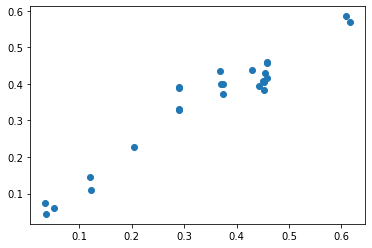

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_evaluation(y_test, predictions):
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('RMSE =',RMSE)

    print('R2 =',r2_score(y_test, predictions))
    print('max error=',max(abs(y_test - predictions)))
    plt.figure()
    plt.scatter(x=y_test, y=predictions)

model_evaluation(y_test, predictions)

# Random forest

RMSE = 0.022499638789518217
R2 = 0.9807256017802133
max error= 0.044102032505596744


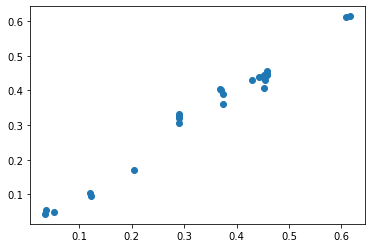

In [24]:
X = train_lm_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values
y = train_lm_scaled['consumption_per_km'].values

from sklearn.ensemble import RandomForestRegressor
# Step 1
# n_estimators=[,,,,,], max_depth=[,,,,,,]

# Curva de aprendizaje
# Variar train size 

# Curva de complejidad
# x cada uno de los parámetros
randF_regr = RandomForestRegressor(n_estimators=50, max_depth=50,
                                   random_state=0,max_features='auto' , criterion='mse')
randF_regr.fit(X, y)
y_pred = randF_regr.predict(test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values)
model_evaluation(y_test, y_pred)

# sklearn linear model

RMSE = 0.04089149226890279
R2 = 0.9363357459291347
max error= 0.0916520534878551


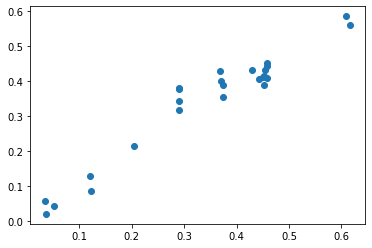

In [21]:
X = train_lm_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values
y = train_lm_scaled['consumption_per_km'].values

from sklearn import linear_model

linear_regr = linear_model.LinearRegression(n_jobs=-1)

linear_regr.fit(X, y)
y_pred_linear = linear_regr.predict(test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values)
model_evaluation(y_test, y_pred_linear)

In [29]:
from sklearn.model_selection import GridSearchCV
print("Initialize Grid Search")
param_grid = { 
    'n_estimators': np.arange(10,70,10),
    'max_depth' : np.arange(10,200,10),
}
# create and fit a regression model, testing each parameter value

 

model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Initialize Grid Search
GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60])})
0.25086074496581884
{'max_depth': 30, 'n_estimators': 10}


# Ann

RMSE = 0.025681316549476106
R2 = 0.9748889829117652
max error= 0.06469193980945231


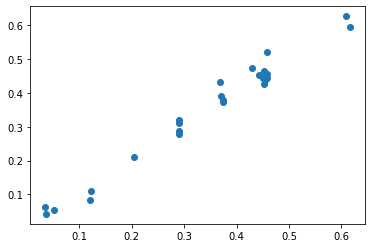

In [23]:
X = train_lm_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values
y = train_lm_scaled['consumption_per_km'].values

from sklearn.neural_network import MLPRegressor

ann_regr = MLPRegressor(random_state=1, activation='relu', alpha=0.001, hidden_layer_sizes= (150,30), max_iter=10500, solver='lbfgs').fit(X, y)

#regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs', activation='relu', alpha=0.002, hidden_layer_sizes=(150,)).fit(X, y)
y_ann=ann_regr.predict(test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values)
ann_regr.score(test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values, y_test)

model_evaluation(y_test, y_ann)


In [388]:
print("Initialize Grid Search")
param_grid = { 
    'solver':['lbfgs'],
     #arning_rate': ["constant", "invscaling", "adaptive"],
    'hidden_layer_sizes': [(150,100), (150,)],
    'activation': ["logistic", "relu"],
    'max_iter':[10500],
    }


# create and fit a regression model, testing each parameter value


model = MLPRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Initialize Grid Search
GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(150, 100), (150,)],
                         'max_iter': [10500], 'solver': ['lbfgs']})
0.44950383377256353
{'activation': 'logistic', 'hidden_layer_sizes': (150,), 'max_iter': 10500, 'solver': 'lbfgs'}


# Save the models

In [386]:
dump(randF_regr, open('randomForest_0_04maxerr_model.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))
dump(scaler_lm, open('scaler_lm.pkl', 'wb'))

# Learning curve

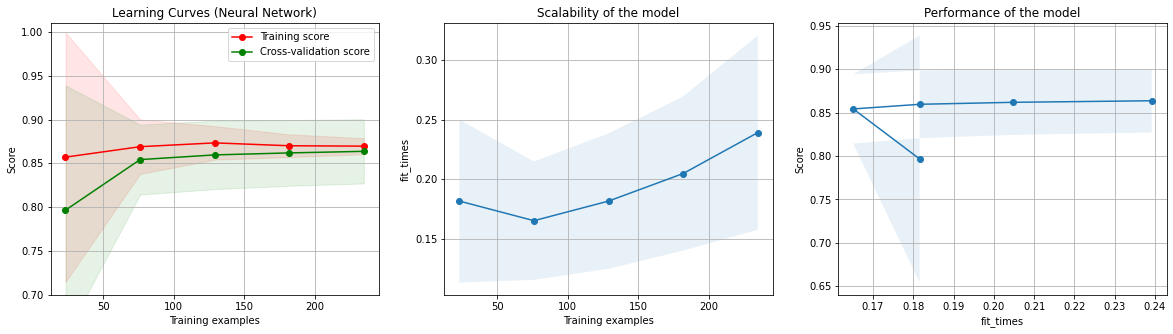

<Figure size 432x288 with 0 Axes>

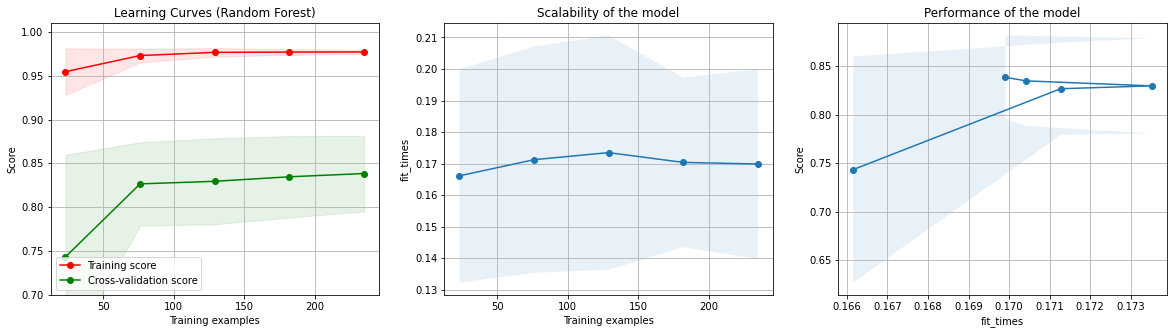

<Figure size 432x288 with 0 Axes>

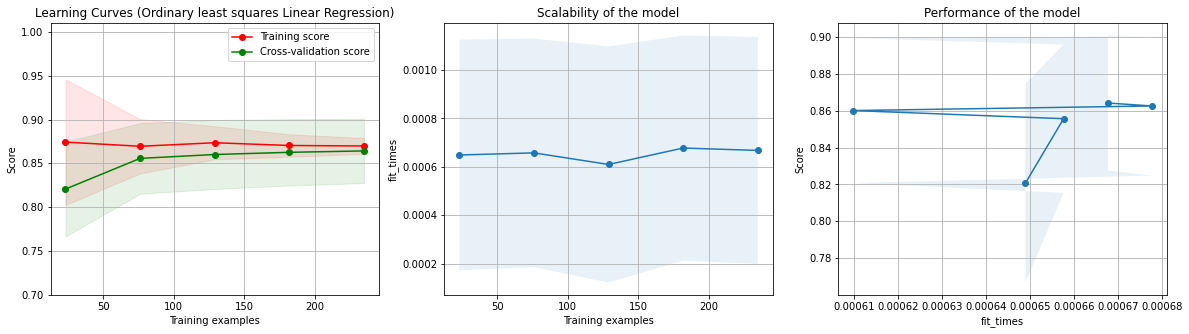

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, np.sort(test_scores_mean), 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


title = "Learning Curves (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPRegressor(random_state=1, activation='logistic', alpha=0.001, hidden_layer_sizes= (150,30),
                         max_iter=10500, solver='lbfgs')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)
plt.show()

plt.figure()
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=60, max_depth=20,
                                   random_state=0,max_features='auto' , criterion='mse', n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

plt.figure()
title = "Learning Curves (Ordinary least squares Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = linear_model.LinearRegression(n_jobs=-1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()


In [453]:
dump(ann_regr, open('ann_regr.pkl', 'wb'))


# Complexity curves

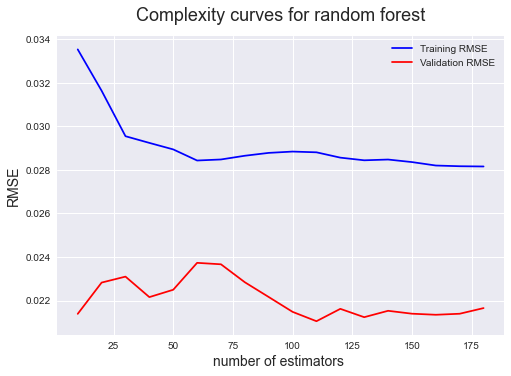

In [411]:
from sklearn.metrics import mean_absolute_error

n_estimators = np.arange(10,190,10)
X_test = test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for estimators in n_estimators:
    reg = RandomForestRegressor(n_estimators = estimators, max_features='auto', max_depth=50, criterion = 'mse', random_state = 0)
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(n_estimators, train_acc, 'b', label = 'Training RMSE')
plt.plot(n_estimators, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('number of estimators ', fontsize = 14)
plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

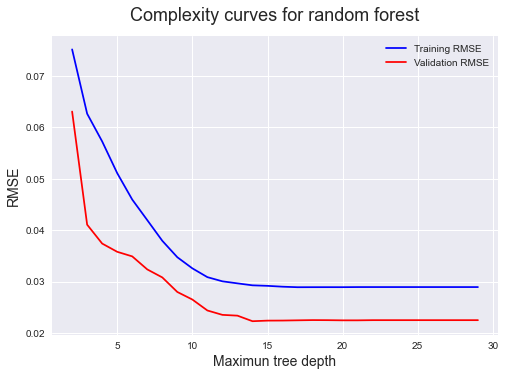

In [410]:
n_estimators = np.arange(2,30,1)
X_test = test_scaled[['mean_max_power_usr','mean_soc','nominal_speed', 'slope']].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for estimators in n_estimators:
    reg = RandomForestRegressor(n_estimators = 50, max_features='auto', max_depth=estimators, criterion = 'mse', random_state = 0)
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(n_estimators, train_acc, 'b', label = 'Training RMSE')
plt.plot(n_estimators, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Maximun tree depth', fontsize = 14)
plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

